<a href="https://colab.research.google.com/github/natalia-mvieira/RecuperacaoDados_Nanodrop/blob/main/Ajuste_das_curvas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import minimize

def func(x, a, b):
    return a*x + b

tabela = pd.read_excel(r'Radiação 230 - médias e desvios 750.xlsx','Dados linearizados (2)')
display(tabela)

,Dia de experimento,0,100,300,500,700,1000,0L,100L,300L,500L,700L,1000L
0,6,0.025250,0.015667,0.014600,0.028500,0.016143,0.033800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,7,0.028889,0.014500,0.006000,0.019333,0.011000,0.022750,0.134631,-0.077387,-0.889262,-0.388073,-0.383582,-0.395896
2,8,0.046400,0.037250,0.022333,0.020000,0.010333,0.022000,0.608473,0.866117,0.425059,-0.354172,-0.446103,-0.429418
3,9,0.052600,0.050000,0.013143,0.028500,0.009250,0.022000,0.733890,1.160488,-0.105143,0.000000,-0.556854,-0.429418
4,10,0.073000,0.073000,0.023000,0.029000,0.010333,0.009000,1.061633,1.538924,0.454473,0.017392,-0.446103,-1.323236
5,11,0.096000,0.104250,0.020000,0.016333,0.005667,0.010000,1.335522,1.895257,0.314711,-0.556696,-1.046877,-1.217876
6,12,0.128250,0.143000,0.028500,0.014500,0.002000,0.012500,1.625155,2.211309,0.668883,-0.675755,-2.088330,-0.994732
7,13,0.192500,0.223333,0.038000,0.019333,0.008667,0.013000,2.031270,2.657130,0.956565,-0.388073,-0.621993,-0.955511
8,14,0.257000,0.318667,0.067500,0.020600,0.010500,0.015333,2.320250,3.012610,1.531106,-0.324613,-0.430102,-0.790432
9,15,0.364667,0.435667,0.105600,0.032333,0.018667,0.024333,2.670158,3.325342,1.978637,0.126195,0.145262,-0.328614


In [ ]:
tabela = tabela.drop(['0', '100','300', '500', '700','1000'], axis=1)
display(tabela)

,Dia de experimento,0L,100L,300L,500L,700L,1000L
0,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,7,0.134631,-0.077387,-0.889262,-0.388073,-0.383582,-0.395896
2,8,0.608473,0.866117,0.425059,-0.354172,-0.446103,-0.429418
3,9,0.733890,1.160488,-0.105143,0.000000,-0.556854,-0.429418
4,10,1.061633,1.538924,0.454473,0.017392,-0.446103,-1.323236
5,11,1.335522,1.895257,0.314711,-0.556696,-1.046877,-1.217876
6,12,1.625155,2.211309,0.668883,-0.675755,-2.088330,-0.994732
7,13,2.031270,2.657130,0.956565,-0.388073,-0.621993,-0.955511
8,14,2.320250,3.012610,1.531106,-0.324613,-0.430102,-0.790432
9,15,2.670158,3.325342,1.978637,0.126195,0.145262,-0.328614


In [ ]:
tabela = tabela.astype(float)
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Dia de experimento  27 non-null     float64
 1   0L                  27 non-null     float64
 2   100L                27 non-null     float64
 3   300L                27 non-null     float64
 4   500L                27 non-null     float64
 5   700L                27 non-null     float64
 6   1000L               27 non-null     float64
dtypes: float64(7)
memory usage: 1.6 KB


In [ ]:
x = np.array(tabela['Dia de experimento'])
y0 = np.array(tabela['0L'])
y100 = np.array(tabela['100L'])
y300 = np.array(tabela['300L'])
y500 = np.array(tabela['500L'])
y700 = np.array(tabela['700L'])
y1000 = np.array(tabela['1000L'])

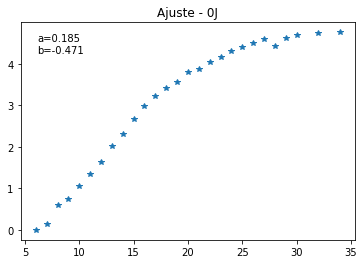

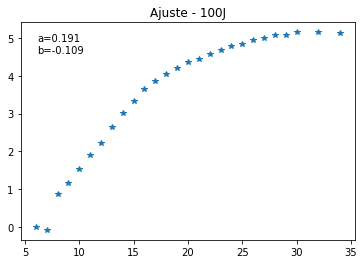

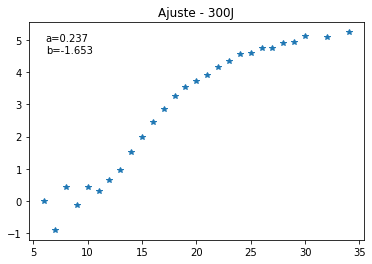

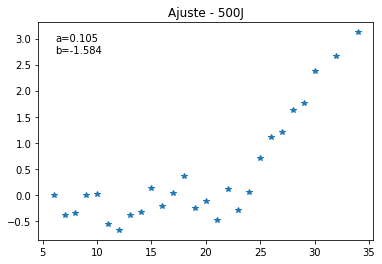

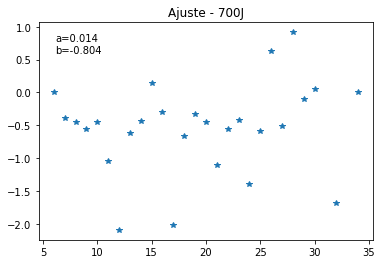

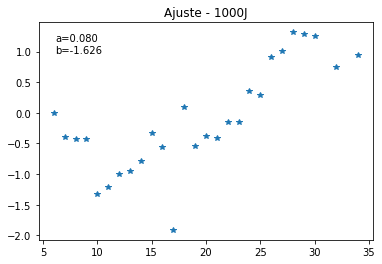

In [ ]:
doses = [y0, y100, y300, y500, y700, y1000]
nomes = ['0','100','300','500','700','1000']

for i,dose in enumerate(doses): #as linhas a seguir foram retiradas da internet e adaptadas
    popt, pcov = curve_fit(func, x, dose)  #popt é o que armazena os parâmetros a e b
    fig, ax = plt.subplots()
    plt.plot(x, dose, '*')
    #plt.plot(x, func(x, *popt))
    textstr = 'a=%5.3f\nb=%5.3f' %tuple(popt)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top')
    plt.title('Ajuste - {}J'.format(nomes[i]))
    plt.show()

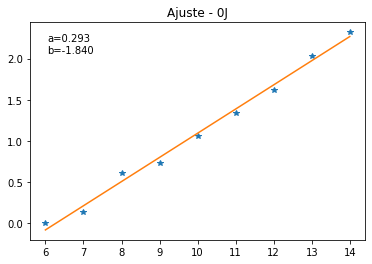

A:0.29343 ErroA:0.00978
B:-1.83978 ErroB:0.10101


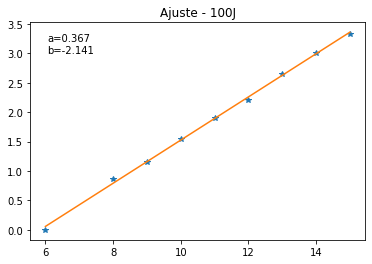

A:0.36665 ErroA:0.00537
B:-2.14055 ErroB:0.06036


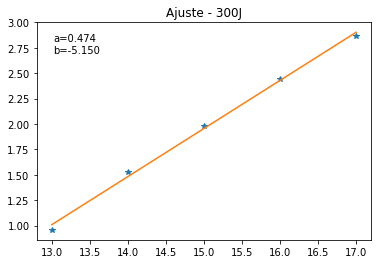

A:0.47374 ErroA:0.01521
B:-5.15039 ErroB:0.22910


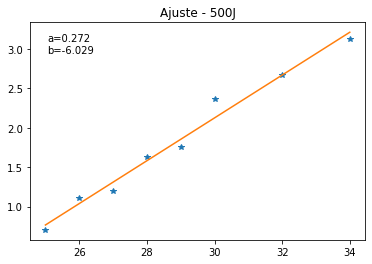

A:0.27187 ErroA:0.01600
B:-6.02946 ErroB:0.46416


In [ ]:
#separando a parte reta dos gráficos: os 5 primeiros pontos de 0,100,300 e 500J; os 5 primeiros de 700J, após descartar os 4 pontos iniciais
#1000J claramente não cresceu, então não houve demais análises
tabela_exp0 = pd.read_excel(r'Radiação 230 - médias e desvios 750.xlsx','Pontos utilizados - 0J').astype(float)
tabela_exp100 = pd.read_excel(r'Radiação 230 - médias e desvios 750.xlsx','Pontos utilizados - 100J').astype(float)
tabela_exp300 = pd.read_excel(r'Radiação 230 - médias e desvios 750.xlsx','Pontos utilizados - 300J').astype(float)
tabela_exp500 = pd.read_excel(r'Radiação 230 - médias e desvios 750.xlsx','Pontos utilizados - 500J').astype(float)
x_exp0 = np.array(tabela_exp0['Dia de experimento'])
x_exp100 = np.array(tabela_exp100['Dia de experimento'])
x_exp300 = np.array(tabela_exp300['Dia de experimento'])
x_exp500 = np.array(tabela_exp500['Dia de experimento'])
y0_exp = np.array(tabela_exp0['0L'])
y100_exp = np.array(tabela_exp100['100L'])
y300_exp = np.array(tabela_exp300['300L'])
y500_exp = np.array(tabela_exp500['500L'])

doses_exp = [y0_exp, y100_exp, y300_exp, y500_exp]
x_exp = [x_exp0, x_exp100, x_exp300, x_exp500]

#mesma ideia que anterior, mas só a parte reta:

def func(x, a, b):
    return a*x + b

for i,dose in enumerate(doses_exp):
    popt, pcov = curve_fit(func, x_exp[i], dose)
    fig, ax = plt.subplots()
    plt.plot(x_exp[i], dose, '*')
    plt.plot(x_exp[i], func(x_exp[i], *popt))
    textstr = 'a=%5.3f\nb=%5.3f' %tuple(popt)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top')
    plt.title('Ajuste - {}J'.format(nomes[i]))
    plt.show()
    fit_a = popt[0] #valor de a
    fit_b = popt[1] #valor de a
    SE = np.sqrt(np.diag(pcov)) #gera os erros
    SE_a = SE[0] #erro de a
    SE_b = SE[1] #erro de b
    print(F'A:{fit_a:.5f} ErroA:{SE_a:.5f}')
    print(F'B:{fit_b:.5f} ErroB:{SE_b:.5f}')

In [ ]:
#o próximo passo é pegar os valores de a e b, os erros, e montar uma planilha para comparar e calcular a fase lag